In [1]:
from ase.io import read
from ase import Atoms
from ase.optimize import *
from ase.visualize import view
from ase.md import *
from ase.calculators.mopac import  *
import nglview
from ase import md
from ase.md import *
from ase.neb import  *
from math import sqrt

This notebook is handed out Th. 6/1/17 and is due Th. 6/15/17


# First two-dimensional IR spectra of ALA-LEU, recorded by an experimental group indicate a possibility for ALA-Leu to be neutral, instead or in addition to its presumed zwitterionic form. Computed linear  IR  spectra  of  different  forms  of Ala-Leu,  in  its  zwitter-ionic  and  neutral  from,  indicate a  clear difference  in  vibrational  signature,  allowing  to  distinguish  different  species  also  in  experimental  1d-spectra.  


# As a colleague you are responsible to calculate reaction energy pathway between zwitterionic and neutral forms.

# To do list:

# -After trying to minimize structure in the gas phase, please minimize it in the presence of implicit solvent!

# -What is the difference between minimized structure in the gas phase and the solvent?

# -Please find the energy barrier between neutral and zwitter-ionic form with the aid of neb method (feel free to use other methods).

# Is it reasonable to calculate energy pathway in the gas phase ? If not,please explain that how your implemented solvent could help?


Minimization in the gas phase:

In [3]:
# Mopac command
calc = Mopac(restart=0, spin=0, OPT=False, functional='PM6', job_type='NOANCI 1SCF GRADIENTS AUX(0,PRECISION=9)', RELSCF=0.0001)

# Read initial structure A (zwitterionic):
A = read('input/A.xyz')
# Alternatively, you can use pdb format if you have any kinds of probelm in visualisation

# minimisation process: 
# Hint: Since it can be very long 30 steps would be enough! (You are weclome to fully minimised it if you want!)
moleculeA = Atoms(A)
moleculeA.set_calculator(calc)
dynA = QuasiNewton(moleculeA)
dynA.run(fmax=0.05, steps = 30)


# write optimised structure A (zwitterionic) :

outfile="output/A.opt.xyz"
moleculeA.write(outfile)

# Read initial structure B (neutral):
B = read('input/B.xyz')
# Alternatively, you can use pdb format if you have any kinds of probelm in visualisation

# minimisation process: 
moleculeB = Atoms(B)
moleculeB.set_calculator(calc)
dynB = QuasiNewton(moleculeB)
dynB.run(fmax=0.05, steps = 30)

# write optimised structure (neutral):
outfile="output/B.opt.xyz"
moleculeB.write(outfile)

BFGSLineSearch:   0[  0]  14:27:13       -7.955411       0.6108
BFGSLineSearch:   1[  2]  14:27:19       -7.984373       0.4097
BFGSLineSearch:   2[  4]  14:27:25       -7.993232       0.4048
BFGSLineSearch:   3[  6]  14:27:31       -8.003143       0.4209
BFGSLineSearch:   4[  8]  14:27:37       -8.015019       0.3399
BFGSLineSearch:   5[ 10]  14:27:43       -8.026808       0.3623
BFGSLineSearch:   6[ 12]  14:27:49       -8.034830       0.5675
BFGSLineSearch:   7[ 14]  14:27:55       -8.050407       0.3326
BFGSLineSearch:   8[ 16]  14:28:01       -8.075486       0.4561
BFGSLineSearch:   9[ 18]  14:28:07       -8.116550       0.9691
BFGSLineSearch:  10[ 20]  14:28:13       -8.149495       0.5160
BFGSLineSearch:  11[ 22]  14:28:19       -8.191770       0.4891
BFGSLineSearch:  12[ 24]  14:28:25       -8.236014       0.5191
BFGSLineSearch:  13[ 26]  14:28:31       -8.298584       0.5950
BFGSLineSearch:  14[ 28]  14:28:37       -8.361395       0.8268
BFGSLineSearch:  15[ 30]  14:28:43      

In [4]:
# Visualize zwitterionic form before minimisation!
wdg_init = nglview.show_structure_file("input/A.pdb")
wdg_init.add_representation('ball+stick')
wdg_init.center_view()
wdg_init.display(gui=True)

In [5]:
# Visualize zwitterionic form after minimisation in the gas phase!
wdg_final = nglview.show_ase(moleculeA)
wdg_final.add_representation('ball+stick')
wdg_final.center_view(range(3))
wdg_final.display(gui=True)

In [6]:
# Visualize neutral form before minimisation!
wdg_init = nglview.show_structure_file("input/B.pdb")
wdg_init.add_representation('ball+stick')
wdg_init.center_view()
wdg_init.display(gui=True)

In [7]:
# Visualize neutral form after minimisation in the gas phase!
wdg_final = nglview.show_ase(moleculeB)
wdg_final.add_representation('ball+stick')
wdg_final.center_view(range(3))
wdg_final.display(gui=True)

Minimisation in the solvent:

In [8]:
# Mopac command (please set the dielectric constant for water as solvent)
calc = Mopac(restart=0, spin=0, OPT=False, functional='PM6', job_type='NOANCI 1SCF GRADIENTS EPS=80.1 AUX(0,PRECISION=9)', RELSCF=0.0001)

# Read initial structure A (zwitterionic):
A = read('input/A.xyz')
# Alternatively, you can use pdb format if you have any kinds of probelm in visualisation

# minimisation process: 
# Hint: Since it can be very long 20 steps would be enough! (You are weclome to fully minimised it if you want!)
moleculeAsol = Atoms(A)
moleculeAsol.set_calculator(calc)
dynAsol = QuasiNewton(moleculeAsol)
dynAsol.run(fmax=0.05, steps = 20)

# write optimised structure A (zwitterionic) :

outfile="output/A.opt.sol.xyz"
moleculeAsol.write(outfile)

# Read initial structure B (neutral):
B = read('input/B.xyz')
# Alternatively, you can use pdb format if you have any kinds of probelm in visualisation

# minimisation process: 
moleculeBsol = Atoms(B)
moleculeBsol.set_calculator(calc)
dynBsol = QuasiNewton(moleculeBsol)
dynBsol.run(fmax=0.05, steps = 20)

# write optimised structure (neutral):
outfile="output/B.opt.sol.xyz"
moleculeBsol.write(outfile)

BFGSLineSearch:   0[  0]  14:34:17      -10.626679       1.6044
BFGSLineSearch:   1[  2]  14:34:25      -10.720702       1.2969
BFGSLineSearch:   2[  4]  14:34:32      -10.763352       0.8352
BFGSLineSearch:   3[  6]  14:34:39      -10.773055       0.4544
BFGSLineSearch:   4[ 76]  14:37:27      -10.776410       0.4006
BFGSLineSearch:   5[155]  14:41:05      -10.777081       0.3059
BFGSLineSearch:   6[164]  14:41:27      -10.777080       0.3059
BFGSLineSearch:   7[172]  14:41:47      -10.777080       0.3059
BFGSLineSearch:   8[180]  14:42:08      -10.777071       0.3059
BFGSLineSearch:   9[267]  14:45:16      -10.777074       0.3058
BFGSLineSearch:  10[324]  14:47:21      -10.777738       0.2599
BFGSLineSearch:  11[383]  14:49:30      -10.784843       0.2116
BFGSLineSearch:  12[391]  14:49:50      -10.784839       0.2116
BFGSLineSearch:  13[397]  14:50:06      -10.784836       0.2116
BFGSLineSearch:  14[480]  14:53:03      -10.784839       0.2116
BFGSLineSearch:  15[488]  14:53:23      

In [9]:
# Visualize zwitterionic form before minimisation!
wdg_init = nglview.show_structure_file("input/A.pdb")
wdg_init.add_representation('ball+stick')
wdg_init.center_view()
wdg_init.display(gui=True)

In [10]:
# Visualize zwitterionic form after minimisation in the solvent!
wdg_final = nglview.show_ase(moleculeAsol)
wdg_final.add_representation('ball+stick')
wdg_final.center_view(range(3))
wdg_final.display(gui=True)

In [11]:
# Visualize neutral form before minimisation!
wdg_init = nglview.show_structure_file("input/B.pdb")
wdg_init.add_representation('ball+stick')
wdg_init.center_view()
wdg_init.display(gui=True)

In [12]:
# Visualize neutral form after minimisation in the solvent!
wdg_final = nglview.show_ase(moleculeBsol)
wdg_final.add_representation('ball+stick')
wdg_final.center_view(range(3))
wdg_final.display(gui=True)

Finding reaction energy barrier :

In [13]:
# Mopac command
calc = Mopac(restart=0, spin=0, OPT=False, functional='PM6', job_type='NOANCI 1SCF GRADIENTS EPS=80.1 AUX(0,PRECISION=9)', RELSCF=0.0001)

# Read initial and final states: (please be sure that you load minimised structures)

initial = read('output/A.opt.sol.xyz')
final = read('output/B.opt.sol.xyz')

# Neb or other methods to find the energy barrier
# Make a band consisting of n images:
n=20
images = [initial]
images += [initial.copy() for i in range(n-2)]
images += [final]
neb = NEB(images)

# Interpolate linearly the potisions of the three middle images:
neb.interpolate()

# Set calculators:
for image in images:
    image.set_calculator(calc)

# Optimize:
optimizer = BFGS(neb, trajectory='output/A2B.traj')
optimizer.run(fmax=0.04, steps=10)

BFGS:   0  15:13:02       -8.540830       4.3005
BFGS:   1  15:14:44       -8.687396       3.4697
BFGS:   2  15:16:26       -8.807356       2.6435
BFGS:   3  15:18:11       -8.927518       1.8596
BFGS:   4  15:19:53       -9.053224       1.6112
BFGS:   5  15:21:32       -9.179603       1.6306
BFGS:   6  15:23:14       -9.295478       1.5640
BFGS:   7  15:24:51       -9.409100       1.4740
BFGS:   8  15:26:38       -9.502521       1.3955
BFGS:   9  15:28:22       -9.584275       1.2923


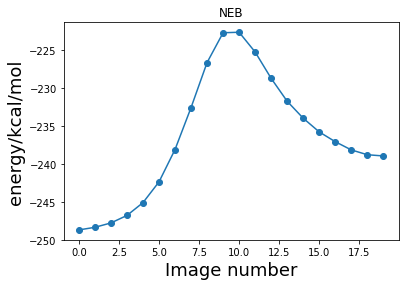

In [14]:
# plot energy profile
eV_in_kcal_per_mol=6.022*3.82929
ei = [eV_in_kcal_per_mol*image.get_potential_energy() for image in images]
n=[i for i in range(len(images))]
import matplotlib.pyplot as pyplot
pyplot.title('NEB')
pyplot.ylabel('energy/kcal/mol',fontsize=18)        
pyplot.xlabel('Image number',fontsize=18)
pyplot.plot(n,ei,'o-',label="scan")
pyplot.show()

In [19]:
ei[10]-ei[-1]

16.320575134253716

In [21]:
from ase.vibrations import Vibrations
vib = Vibrations(images[10])
vib.run()
vib.summary()

Writing vib.eq.pckl
Writing vib.0x-.pckl
Writing vib.0x+.pckl
Writing vib.0y-.pckl
Writing vib.0y+.pckl
Writing vib.0z-.pckl
Writing vib.0z+.pckl
Writing vib.1x-.pckl
Writing vib.1x+.pckl
Writing vib.1y-.pckl
Writing vib.1y+.pckl
Writing vib.1z-.pckl
Writing vib.1z+.pckl
Writing vib.2x-.pckl
Writing vib.2x+.pckl
Writing vib.2y-.pckl
Writing vib.2y+.pckl
Writing vib.2z-.pckl
Writing vib.2z+.pckl
Writing vib.3x-.pckl
Writing vib.3x+.pckl
Writing vib.3y-.pckl
Writing vib.3y+.pckl
Writing vib.3z-.pckl
Writing vib.3z+.pckl
Writing vib.4x-.pckl
Writing vib.4x+.pckl
Writing vib.4y-.pckl
Writing vib.4y+.pckl
Writing vib.4z-.pckl
Writing vib.4z+.pckl
Writing vib.5x-.pckl
Writing vib.5x+.pckl
Writing vib.5y-.pckl
Writing vib.5y+.pckl
Writing vib.5z-.pckl
Writing vib.5z+.pckl
Writing vib.6x-.pckl
Writing vib.6x+.pckl
Writing vib.6y-.pckl
Writing vib.6y+.pckl
Writing vib.6z-.pckl
Writing vib.6z+.pckl
Writing vib.7x-.pckl
Writing vib.7x+.pckl
Writing vib.7y-.pckl
Writing vib.7y+.pckl
Writing vib.7z

From the normal mode analysis we can see that the we get complex frequencies for the potential transition state. So it is truly a transition state. The energy barrier from the neutral to the zwitter-ionic form is 16.3 kcal/mol. The reaction requires a proton transfer where water is required. This can be seen in image 10 which is the transition state. Bacause of that the effect of the water has to be taken into account.

In [20]:
# Visualize transition state in the solvent!
wdg_final = nglview.show_ase(images[10])
wdg_final.add_representation('ball+stick')
wdg_final.center_view(range(3))
wdg_final.display(gui=True)